# Time-Delay of Arrival (TDoA) and Direction of Arrival (DoA) Estimation

In [multi-channel speech enhancement](Multi-channel_speech_enhancement.md), a regularly appearing task is to estimate the time-delay between channels or equivalently, the angle at which a wavefront arrives to an array of microphones. By knowing the time-delay or angle of arrival, we can use beamforming to isolate sounds from that particular direction. 
A frequently used method for time-delay estimation is the generalized cross-correlation (GCC) method and especially its PHAT-weighted variant known as GCC-PHAT {cite:p}`knapp1976gcc,azaria1984time,byoungho2010gccphat`.

## Generalized cross-correlation

The cross-spectrum of two spectra $X_{1,k,t}$ and $X_{2,k,t}$ is

$$
C_{k,t} = X_{1,k,t}^* X_{2,k,t},
$$

where $k$ and $t$ are the frequency and time indices. The spectra are of form $X_{h,k}=a_{h,k} e^{i\frac{2\pi kn_h}N}$, where $n_h$ is the time-offset and $N$ is the length of the analysis window. We thus have

$$
C_k 
= a_{1,k} e^{-i\frac{2\pi kn_1}N} a_{2,k} e^{i\frac{2\pi kn_2}N}
.
$$

If the time-difference between channels is $\tau=n_2-n_1$, then

$$
C_k 
= a_{1,k}a_{2,k} e^{-i\frac{2\pi kn_1}N+i\frac{2\pi k(\tau+n_1)}N}
= a_{1,k}a_{2,k} e^{i\frac{2\pi k\tau}N}
.
$$


It can be weighted with a variety of approaches such as

$$
C_k' = \frac{X_{1,k}^* X_{2,k}}{|X_{1,k}^* X_{2,k}|} = e^{i\frac{2\pi k\tau}N}
$$

to obtain the generalized cross-spectrum. The generalized cross-correlation is the inverse Fourier transform of the generalized cross-spectrum

$$
r_k' = {\mathcal F}^{-1}\{C_k'\} = \delta_\tau,
$$

where $\delta_k$ is the [Dirac-delta function](https://en.wikipedia.org/wiki/Dirac_delta_function). In other words, the generalized cross-covariance has a single peak whose position indicates the time-delay $\tau$ between the two channels.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
import IPython.display as ipd
from helper_functions import stft

# read from storage
filename = 'sounds/temp.wav'
fs, data = wavfile.read(filename)

delay_samples = 20
delay_zeros = np.zeros(delay_samples)

data1 = np.concatenate((data,delay_zeros))
data2 = np.concatenate((delay_zeros,data))

noise_gain_dB = -10
noise_gain = np.std(data)*10**(noise_gain_dB/20)

observation1 = data1 + noise_gain*np.random.randn(len(data1))
observation2 = data2 + noise_gain*np.random.randn(len(data1))

In [2]:
X1 = stft(observation1,fs)
X2 = stft(observation2,fs)

crossspectrum = np.mean(np.conj(X1)*X2,axis=0)
crosscorrelation = scipy.fft.irfft(crossspectrum/np.abs(crossspectrum))

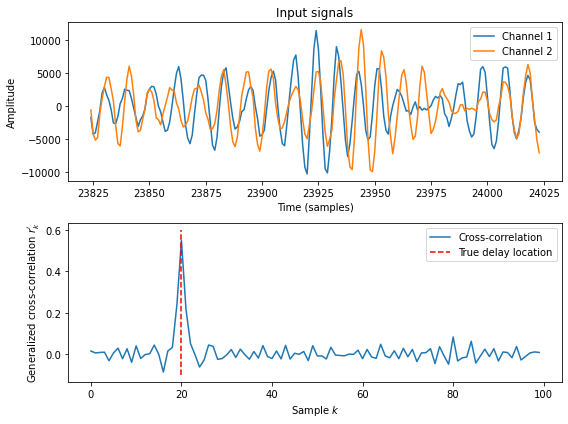

In [3]:
plt.figure(figsize=[8,6])
plt.subplot(211)
ix = np.argmax(observation1)
plt.plot(range(ix-100,ix+100),observation1[(ix-100):(ix+100)],label='Channel 1')
plt.plot(range(ix-100,ix+100),observation2[(ix-100):(ix+100)],label='Channel 2')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Input signals')

plt.subplot(212)
plt.plot(crosscorrelation[0:100],label='Cross-correlation')
plt.plot([delay_samples,delay_samples],[-.1,.6],'r--',label='True delay location')
plt.legend()
plt.xlabel('Sample $k$')
plt.ylabel("Generalized cross-correlation $r_k'$")

plt.tight_layout()
plt.show()


## References

```{bibliography}
:filter: docname in docnames
```